# Project: Investigate a Dataset - [No-Show-Appointment]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> 110.527 medical appointments its 14 associated variables (characteristics). The most important one if the patient show-up or no-show to the appointment. Variable names are explained below. 

**PatientId     :** Identification of a patient 

**AppointmentID :** Identification or each appointment  

**Gender        :** Male or Female. Female is the greater proportion, woman takes way more care of they health in comparison to man. 

**ScheduledDay  :** The day of the actual appointment, when they have to visit the doctor. 

**AppointmentDay:** The day someone called or registered the appointment, this is before appointment of course. 

**Age           :** How old is the patient? 

**Neighbourhood :** Where the appointment takes place. 

**Scholarship   :** 1/0. Observation, this is a broad topic. 

**Hipertension  :** 1/0. 

**Diabetes      :** 1/0. 

**Alcoholism    :** 1/0. 

**Handcap       :** 1/0. 

**SMS_received  :** One or more messages sent to the patient.

**No-show       :** 1/0. It indicates whether the patient did show up. 1: No-show, 0:Show up. It is s bit tricky because 1 means No-show.


### Question(s) for Analysis

>**Research Question 1:**
Are No-Show and "Gender, Age, Neughbourhood, Scholarship, Hipertention, Diabetes, Alcoholism, Handcap, Sms received" associated with each other?

>**Research Question 2:**
What are the average appointment No-Show rates of the neighborhoods with the longest waiting time?

>**Research Question 3:**
Are those who make an appointment on the same day more likely to come to their appointment than those who make an appointment on the following days?

>**Follow up Question:**
Are those who make an appointment on the same day more likely to come to their appointment than those who make an appointment on the following days?

In [1]:
#I need to install this package in order to plot missing values
!pip install missingno

In [81]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import missingno as msno
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [82]:
#plotting functions

def replaced_1_0(col_list):
    for i in col_list:
        df[i] = df[i].apply(lambda x:1 if x=='Yes' else 0)

def count_plot_NoShow(df,col_list,title): 
    sns.countplot(data=df, x=col_list, hue="no_show") 
    plt.title(title)
    
def avg_no_show(col):
    avg_col = df.groupby(col).mean()['no_show'].round(2)
    vals = avg_col.values
    avg_col.plot(kind='bar',color='b')
    plt.title(f'{col.upper()} Appointment No Show-up %Percentage')
    plt.xlabel(col)
    plt.ylabel('Percentage')
    for i in range(len(vals)):
            plt.text(i,avg_col[i],avg_col[i])
            
def avg_no_show_by_zero_waitingday(col):
    val=df.query('waiteddays == 0').groupby(col).mean()['no_show'].sort_values(ascending=False).round(2)
    vals=val.values
    val.plot(kind='bar',color='b')
    plt.xlabel(col)
    plt.ylabel('Percentage')
    for i in range(len(vals)):
                plt.text(i,val[i],val[i])
    plt.title(f"Average No-Show percentage of patients by {col} who made an appointment on the same day on a daily basis");

def avg_no_show_by_different_waitingdays(col):
    val=df.query('waiteddays != 0').groupby(col).mean()['no_show'].sort_values(ascending=False).round(2)
    vals=val.values
    val.plot(kind='bar',color='b')
    plt.xlabel(col)
    plt.ylabel('Percentage')
    for i in range(len(vals)):
                plt.text(i,val[i],val[i])
    plt.title(f"Average No-Show percentage of patients by {col} who made an appointment on the same day on a daily basis");
    
def plot_avg_by_gender(col,gender):
    avg_col = df.query(f'gender=={gender}').groupby(col).mean()['no_show'].sort_values(ascending=False).round(2)
    vals = avg_col.values
    avg_col.plot(kind='bar',color='b')
    plt.title(f'{col.upper()} Appointment No Show-up %Percentage Gender:{gender}')
    plt.xlabel(col)
    plt.ylabel('Average')
    for i in range(len(vals)):
            plt.text(i,avg_col[i],avg_col[i])
        
def compare_with_NoShow_distplot(col):
    sns.distplot(df[no_show][col],color='b')
    sns.distplot(df[yes_show][col],color='r')
    red_p = mpatches.Patch(color='red', label=f'{col} by Yes-Show')
    blue_p = mpatches.Patch(color='blue', label=f'{col} by No-Show')
    plt.legend(handles=[red_p ,blue_p])
    plt.title(f'{col} by No-Show Column')
    plt.legend()

In [44]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas 

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [83]:
# Loading my dataset
df =pd.read_csv('Database_No_show_appointments/noshowappointments2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
#let's check the columns
for i, v in enumerate(df.columns):
    print(i, v)

0 PatientId
1 AppointmentID
2 Gender
3 ScheduledDay
4 AppointmentDay
5 Age
6 Neighbourhood
7 Scholarship
8 Hipertension
9 Diabetes
10 Alcoholism
11 Handcap
12 SMS_received
13 No-show


> As I know before, there are some columns indicate disabilities or health issues. **Scheduled Day** and **Appointment Day** columns look interesting. We will discover it.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> Mainly, we have numerical data due to the 1-0 values and Age either.

> Date's data type must be converted to the datetime.

In [12]:
# number of rows
df.shape[0]

110527

In [13]:
# number of columns
df.shape[1]

14

In [14]:
#unique numbers of the columns
for i in df.columns:
    print( i+':',df[f'{i}'].nunique())

PatientId: 62299
AppointmentID: 110527
Gender: 2
ScheduledDay: 103549
AppointmentDay: 27
Age: 104
Neighbourhood: 81
Scholarship: 2
Hipertension: 2
Diabetes: 2
Alcoholism: 2
Handcap: 5
SMS_received: 2
No-show: 2


> We have 81 neighbourhoods which can be helpful to dive into the dataset. I will take it into the account.

In [15]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> We keep eye on the characteristic of the dataset. Patient ID or Appointment ID are not handy in terms of my interest. I will get rid of them.

> Average age is 37 and its quantiles order as [-1,18,37,55,115]. I will remove the negative numbers and oversee the count of 115 max age which can help to have meaningful approach.


### Data Cleaning
 

So far,

1.I decided to change **Incorrect Data Types**

2.I will resolve the **Structural Problems**,such as Column Names

3.**Drop irrelevant columns**,such as Patient Id and Appointment Id

4.**Deduce** the data.

5.**Handle with irrelevant values** of the created features.

#### Deduce the Dataset

In [84]:
#firstly it looks 0 duplicated
df.duplicated().sum()

0

In [85]:
df.drop_duplicates(inplace=True)

In [86]:
df.drop(columns=['PatientId','AppointmentID'],inplace=True)

>I will inspect the dataset regardless of Patient or Appointment ID.


**Is there any missing data?**

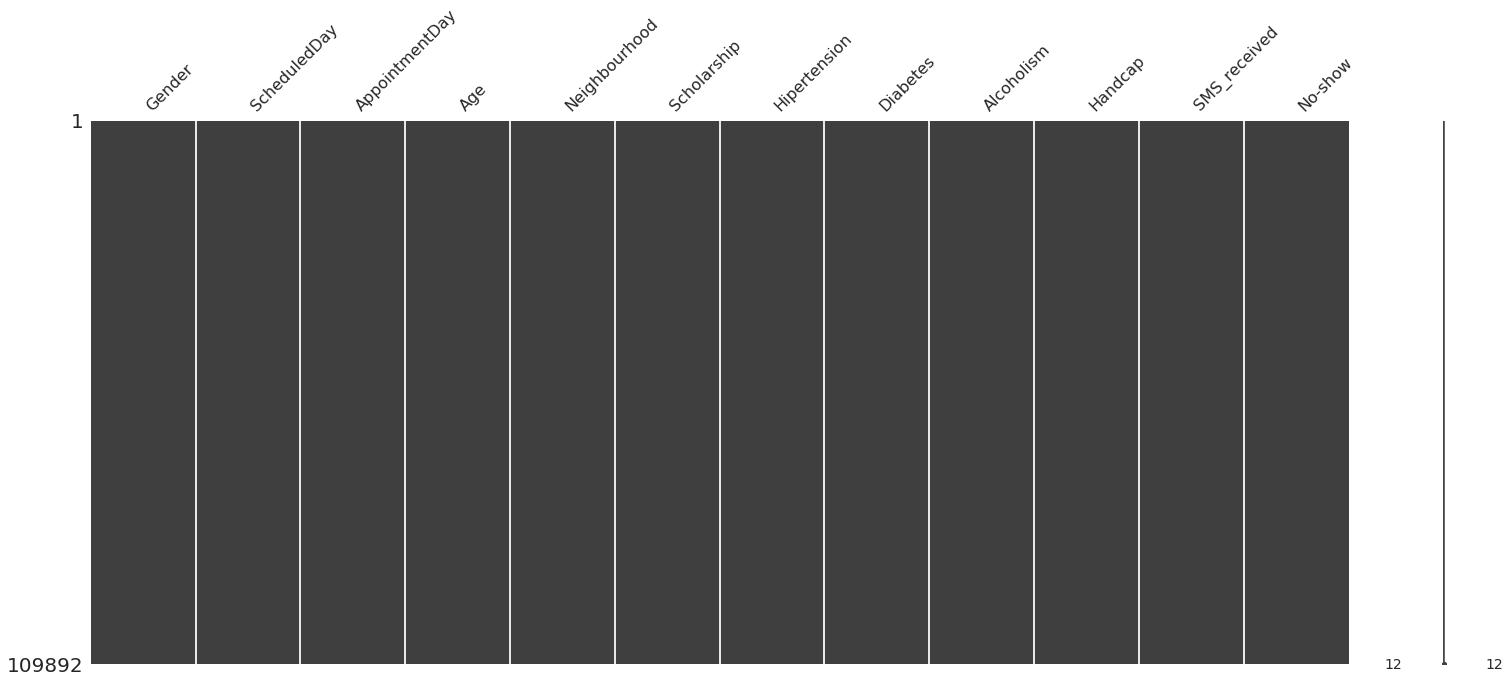

In [42]:
msno.matrix(df);

In [75]:
#null numbers per columns-There is no any null value
df.isnull().sum()
#df.isnull().any()

Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

>Good news! I don't have any missing value.

**Incorrect data types and Create New Features**

In [87]:
col_list = ['No-show']
replaced_1_0(col_list)
#replace F/M gender to 1-0
df['Gender'].replace({'M':1,'F':0},inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


> I have replaced the values of the **Gender** from M/F to 1-0 numeric values. It helps to indicate some characteristic informations.

In [88]:
df['No-show'].value_counts()

0    88208
1    22319
Name: No-show, dtype: int64

> Majority of the patients did show up in the appointments! But we will navigate the No-shows.

In [89]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'], errors='raise', dayfirst=False, yearfirst=False, utc=None, format=None, exact=True, unit=None, infer_datetime_format=False, origin='unix', cache=True)

In [90]:
#I created Scheduled Time (hour) feature
df['ScheduledTime'] = df['ScheduledDay'].dt.time

In [91]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'], errors='raise', dayfirst=False, yearfirst=False, utc=None, format=None, exact=True, unit=None, infer_datetime_format=False, origin='unix', cache=True)

In [92]:
# I created one more column implies which day of the Appointment
df['dayofweekAppointment'] = df['AppointmentDay'].dt.strftime('%A')
# I created one more column implies which day of the Scheduled
df['dayofweekScheduled'] = df['ScheduledDay'].dt.strftime('%A')

In [93]:
#Correct the data types
df['ScheduledDay']  = df['ScheduledDay'].dt.date.astype('<M8[ns]')

> **Scheduled Day** and **Appointment Day** dtypes are converted to datetime.

> I divided to **hours of the appointments** into the new columns. Maybe I can ask a question regarding it.

> I created **Day of the Appointment** and **Day of the Scheduled** which indicate days of the dates. I looks very interesting to state a question.

In [30]:
#let's take a look 
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledTime,dayofweekAppointment,dayofweekScheduled
0,0,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,18:38:08,Friday,Friday
1,1,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,16:08:27,Friday,Friday
2,0,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,16:19:04,Friday,Friday
3,0,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,17:29:31,Friday,Friday
4,0,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,16:07:23,Friday,Friday


**AppointmentDay** : Day of the Appointment

**ScheduledDay**    : Day of the patient called or registered it.

In [94]:
df['WaitedDays']=(df['AppointmentDay']-df['ScheduledDay']).dt.days.astype(int)

I created **Waited Days** which implies how many days the patients waited for appointment

In [95]:
df['WaitedDays'].value_counts()[df['WaitedDays'].value_counts().index<0]

-1    4
-6    1
Name: WaitedDays, dtype: int64

Oops! I noticed that we have negative Waited Days, I'll handle with it.

In [96]:
df.query('WaitedDays < 0')

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledTime,dayofweekAppointment,dayofweekScheduled,WaitedDays
27033,1,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,1,10:51:53,Monday,Tuesday,-1
55226,0,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,1,14:50:41,Tuesday,Wednesday,-1
64175,0,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,1,13:43:58,Wednesday,Thursday,-1
71533,0,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,1,13:49:20,Thursday,Wednesday,-6
72362,1,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,1,06:50:57,Tuesday,Wednesday,-1


>The irrelevant values are not so many, I assume that Scheduled days and Appointment Days exchanged.

>I navigate some negative incorrect Waited Days 

In [97]:
ind = df.query('WaitedDays == -1 or WaitedDays == -6').index
temp = df.loc[ind,'AppointmentDay']
df.loc[ind,'AppointmentDay'] = df.loc[ind,'ScheduledDay']
df.loc[ind,'ScheduledDay'] = temp
#We exchanged dates which causes negative Waited days, now it is time to update Waited Days
df['WaitedDays']=(df['AppointmentDay']-df['ScheduledDay']).dt.days.astype(int)

In [98]:
#Let's check
df.query('WaitedDays < 0')
#Yes,I did it. there is no more nonsense value

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledTime,dayofweekAppointment,dayofweekScheduled,WaitedDays


I don't have any negative duration. That is good news! I will go ahead!

In [36]:
df.shape

(110527, 16)

The new number of columns are 16 and rows are 109892.

In [99]:
df['Age'][df['Age']>100]

58014    102
63912    115
63915    115
68127    115
76284    115
90372    102
97666    115
Name: Age, dtype: int64

Oops! We have some Age rows bigger than 100. Only 6 rows! I will keep it, becuase only 6 rows

In [100]:
df['age_range']=pd.qcut(df['Age'], q=4, labels=['child','young','adult','old']).astype("object")

> I created a new column **"age_range"** with quantiles. Range of the age categories are below.

>chid=0-18 , young=19-37, adult=38-55, old=+55


**Structural Problems**

In [101]:
df.rename(columns=lambda x: x.strip().lower().replace(" ","_"), inplace=True)
df.rename(columns=lambda x: x.strip().lower().replace("-","_"), inplace=True)

I converted the column names to lower string and underscope instead of the space. Let's check whether data types after converting.

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110526
Data columns (total 17 columns):
gender                  110527 non-null int64
scheduledday            110527 non-null datetime64[ns]
appointmentday          110527 non-null datetime64[ns]
age                     110527 non-null int64
neighbourhood           110527 non-null object
scholarship             110527 non-null int64
hipertension            110527 non-null int64
diabetes                110527 non-null int64
alcoholism              110527 non-null int64
handcap                 110527 non-null int64
sms_received            110527 non-null int64
no_show                 110527 non-null int64
scheduledtime           110527 non-null object
dayofweekappointment    110527 non-null object
dayofweekscheduled      110527 non-null object
waiteddays              110527 non-null int64
age_range               110527 non-null object
dtypes: datetime64[ns](2), int64(10), object(5)
memory usage: 15.2+ MB


It looks good. I have appropriate data types.

Let's dive into the Age column. Is there any negative Age?

In [103]:
df[df['age']<0]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,scheduledtime,dayofweekappointment,dayofweekscheduled,waiteddays,age_range
99832,0,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,0,08:58:13,Monday,Monday,0,child


In [104]:
df = df[df['age']>=0]

Only 1 row has negative Age, we can handle it with this way!

In [105]:
#Seperate the dataframe with Target column
no_show = df['no_show']==1 #if the patient didn't show up, then value is 1.
yes_show = df['no_show']==0
#When I need filter for show up or no show up, I will use them.

In [97]:
df[no_show].shape

(22098, 17)

In [98]:
df[yes_show].shape

(87793, 17)

In No-Show up part, I have 22098 rows and 17 column. However I have 87793 rows and 17 columns in Show-Up part.

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (Are No-Show and "Gender,  Age, Neughbourhood, Scholarship, Hipertention, Diabetes, Alcoholism, Handcap, Sms received" associated with each other?)

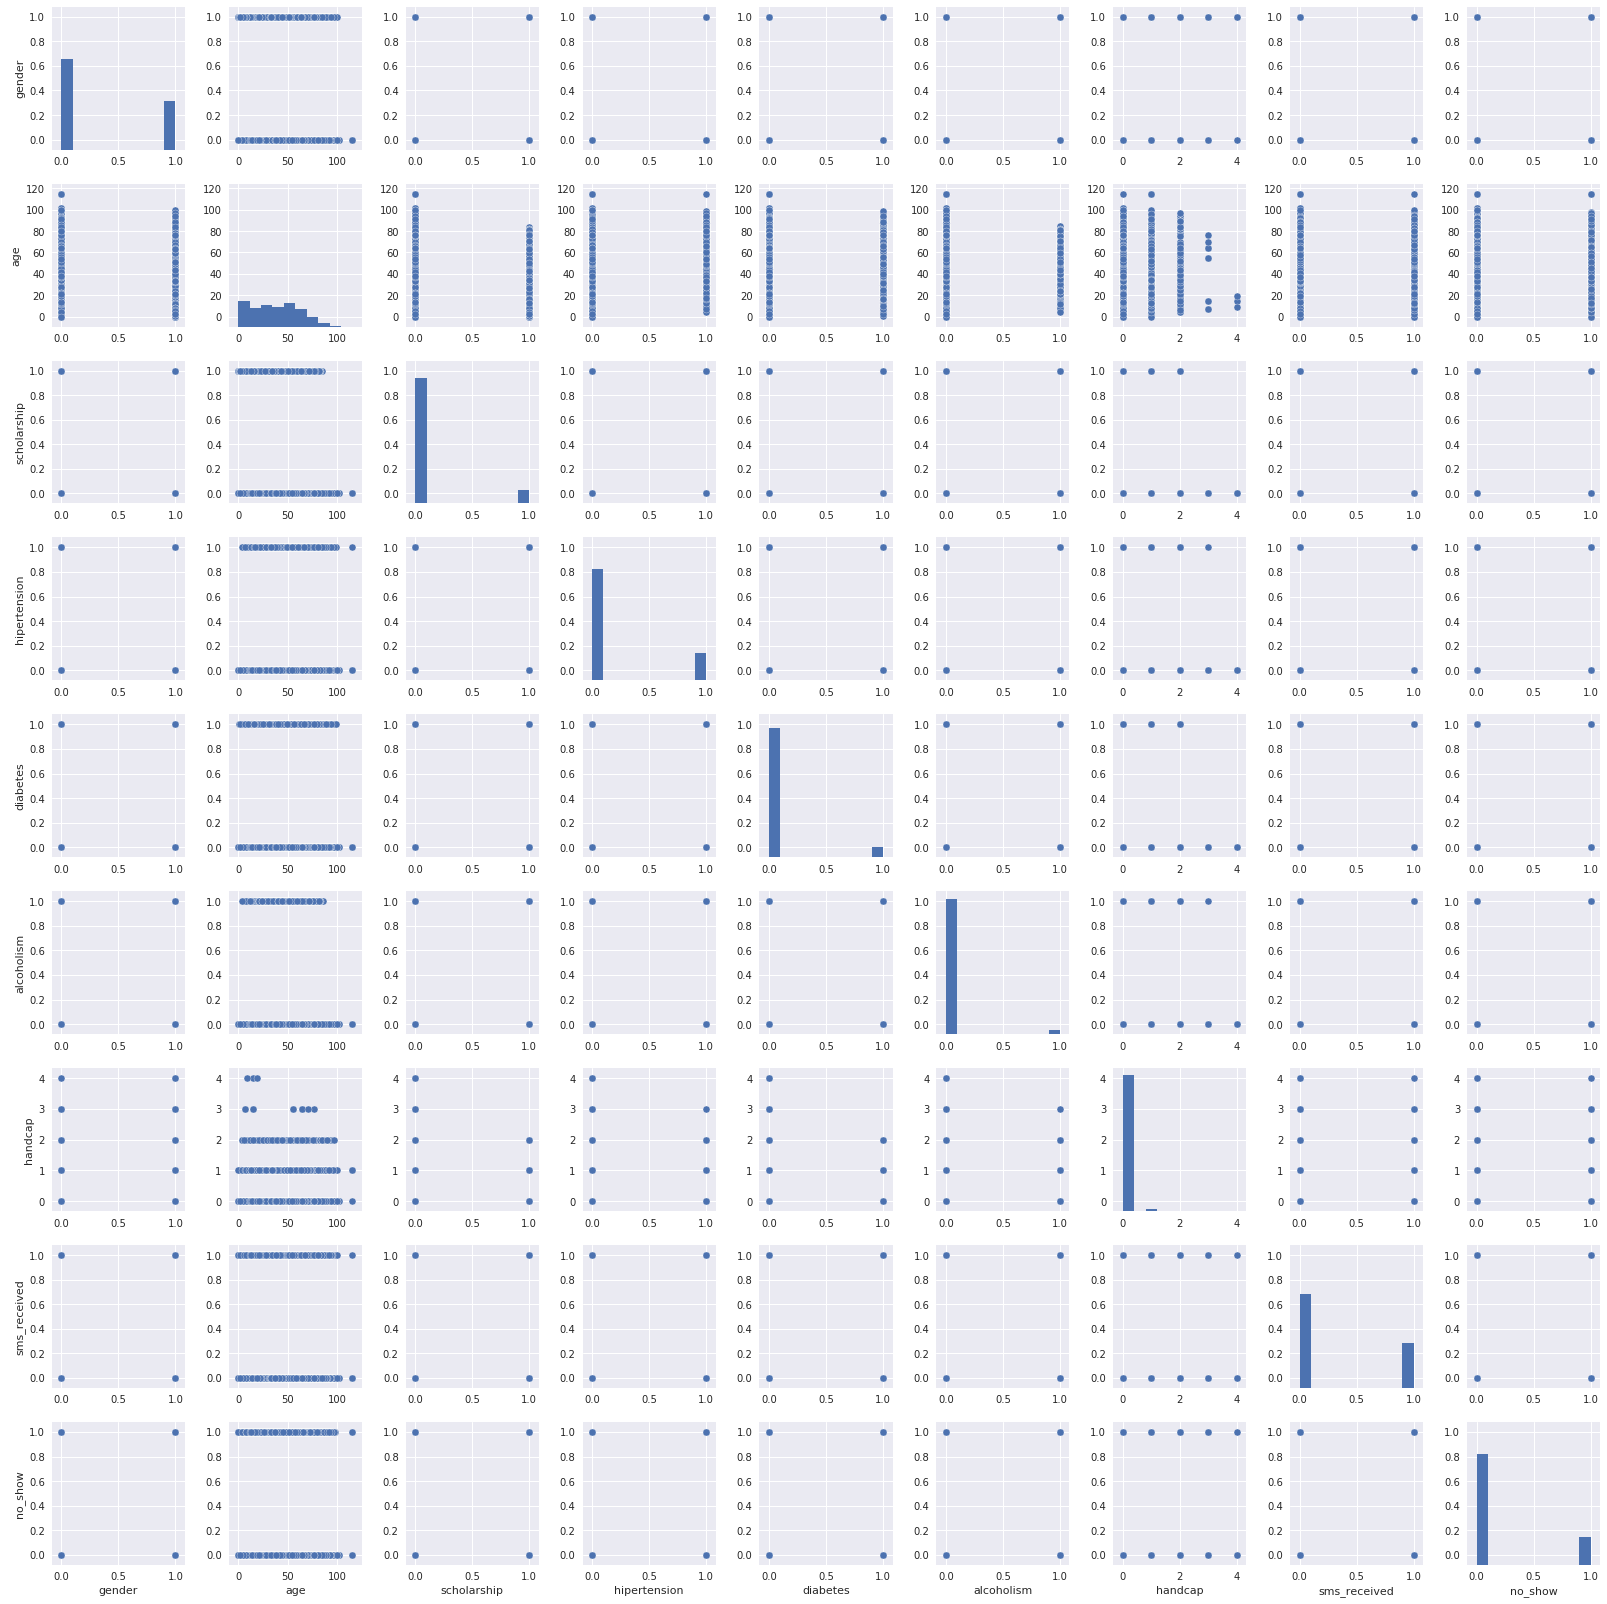

In [49]:
sns.pairplot(df)

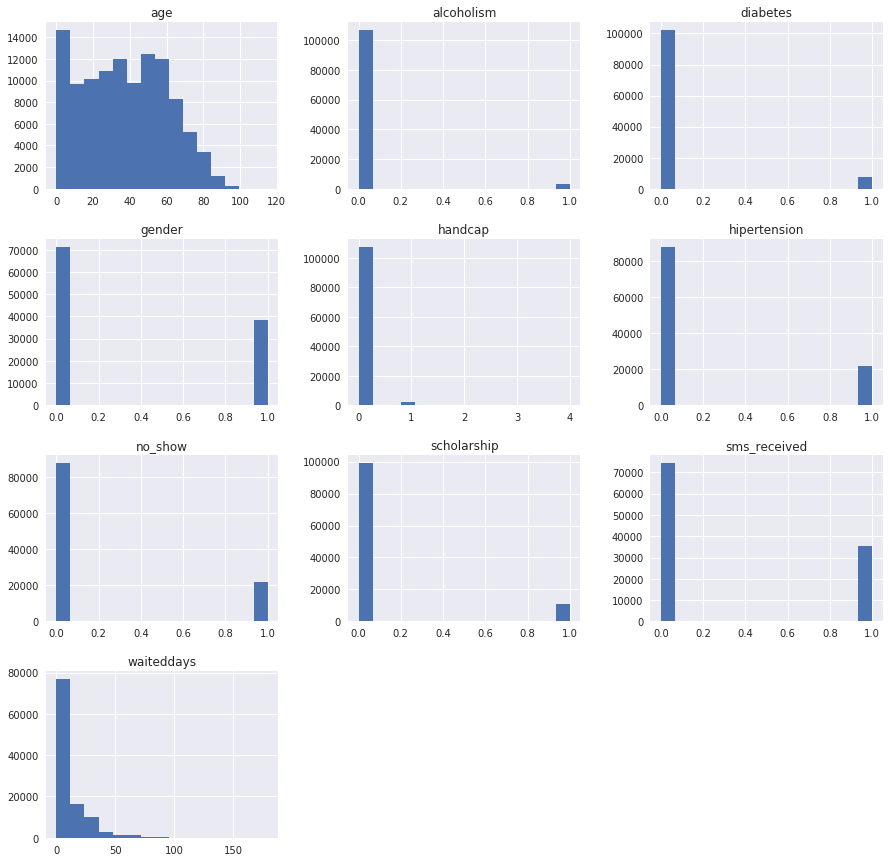

In [100]:
df.hist(figsize=(15,15),bins=15);

In [106]:
#I will check the attendance percentage
df['no_show'].value_counts(normalize=True)

0    0.798066
1    0.201934
Name: no_show, dtype: float64

> Percentage of attendance is around %80!

In [107]:
#I glanced the statistical characteristic of the dataset.
df.describe()

,gender,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,waiteddays
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,0.350026,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.201934,10.183975
std,0.476980,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445,15.254914
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,15.000000
max,1.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,179.000000


> According to the table, the average appointments were given after 10 days.

> Standart Deviation of the Age is 23.

> %25,%50,%75 quantiles of the Age is 18,37,55.

> Average No-Show is %20. It means that around %20 of the patients attended their appointments.

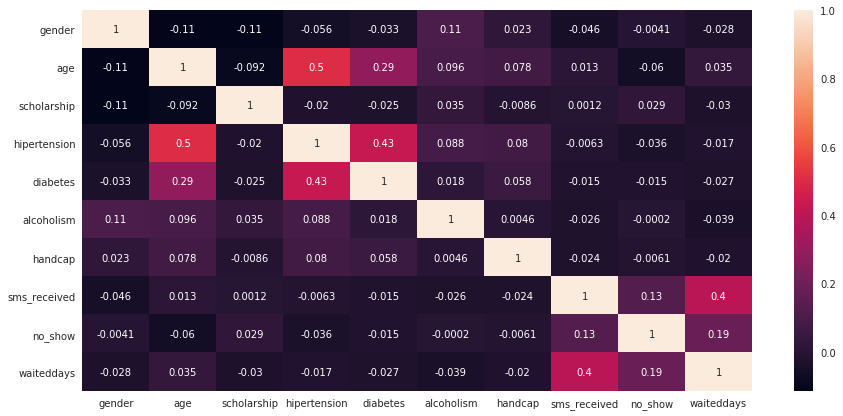

In [108]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True);

In [109]:
abs(df.corr()['no_show']).sort_values(ascending=False)

no_show         1.000000
waiteddays      0.186253
sms_received    0.126428
age             0.060327
hipertension    0.035704
scholarship     0.029134
diabetes        0.015181
handcap         0.006077
gender          0.004122
alcoholism      0.000197
Name: no_show, dtype: float64

**Waiting Duration, Sms Received** have the highest correlation with No-Show around %13 and %20.      

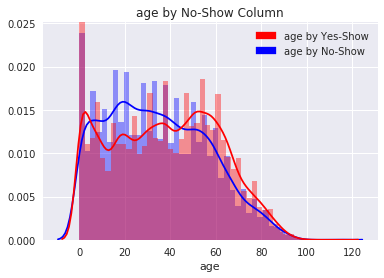

In [110]:
compare_with_NoShow_distplot('age')

Age distributions by attendance look very similar. My first insight is that age doesn't change the attendance of the appointment. We will keep eye on it!

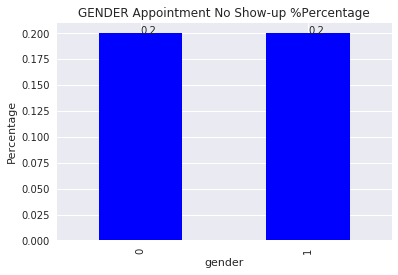

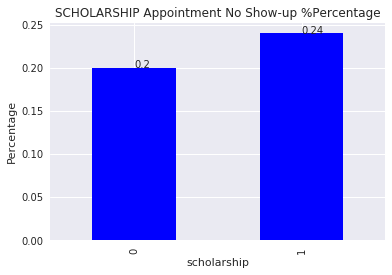

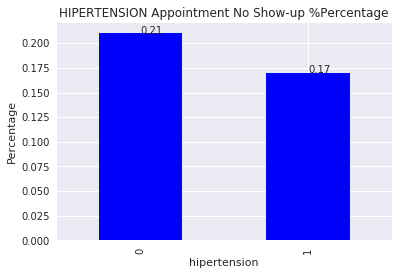

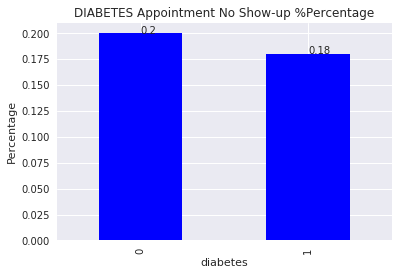

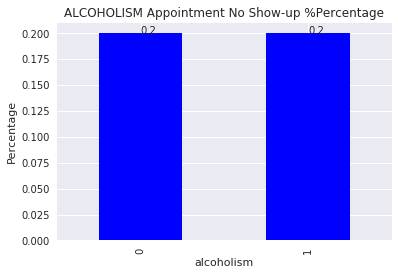

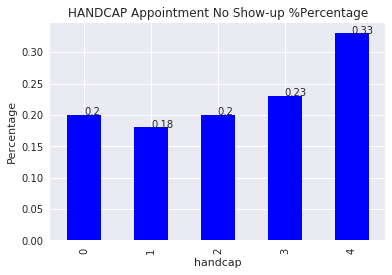

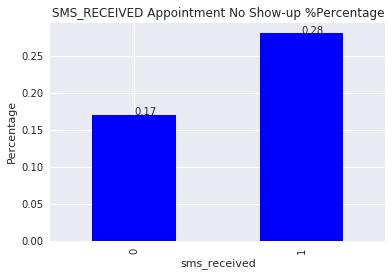

In [111]:
for i in ['gender','scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap','sms_received']: 
    avg_no_show(i)
    plt.show()

According to the rates we have, 

>1.The ratio of being a No-show varies between 18% and 30% according to the Handicap status. The No-Show rate of patients without any handicap is 20%.

>2.**Gender** or **Alcohol** use has **no effect** on the No-Show rate.

>3.Those who received reminder Sms have an 11% higher No-Show average rate compared to those who do not.

### Research Question 2 (What are the average appointment No-Show rates of the neighborhoods with the longest waiting time?)

In [112]:
df['waiteddays'].max() 

179

In [113]:
df['waiteddays'].mean().round()

10.0

Waiting duration differ between **0 to 179 days**. And average duration is around **10 days**. Let's dive into this.

In [114]:
longest_duration = df.groupby('neighbourhood').mean()['waiteddays'].sort_values(ascending=False)[:10]
longest_duration

neighbourhood
ILHAS OCEÂNICAS DE TRINDADE    29.000000
SANTA CECÍLIA                  21.948661
JARDIM CAMBURI                 18.761306
FONTE GRANDE                   17.866569
MARUÍPE                        16.430074
NAZARETH                       16.229630
MONTE BELO                     15.362864
JUCUTUQUARA                    14.974063
AEROPORTO                      14.750000
SEGURANÇA DO LAR               14.151724
Name: waiteddays, dtype: float64

>Here I reflected on the 10 neighborhoods with the longest average appointment waiting period. Top 10 average durations differ 29 days to 14 approximatedly.

>Let's find the average no-show values of neighborhoods with these durations.

#### Average No-Show of the Longest Duration in Neighbourhoods

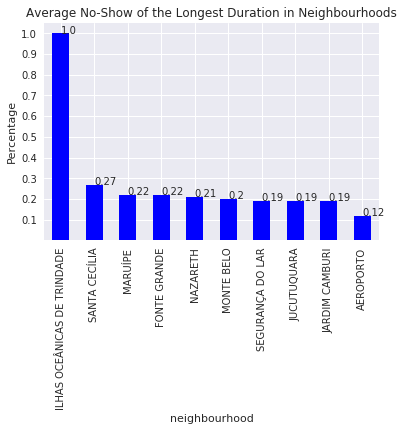

In [115]:
filter1 = df["neighbourhood"].isin(longest_duration.index)
vals =df[filter1].groupby("neighbourhood").mean()['no_show'].round(2).sort_values(ascending=False)
val = vals.values
vals.plot(kind='bar',color='b').set(title="Average No-Show of the Longest Duration in Neighbourhoods");
plt.ylabel('Percentage')
plt.yticks([0.10,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
for i in range(len(vals)):
        plt.text(i,val[i],val[i])

> Among the neighbourhoods with the longest appointment waiting period, the cities with the highest No-show average are **Ilhas, Santa Cecilia, Maruipe**.

>ILHAS OCEÂNICAS DE TRINDADE neighbourhood has **the highest risk** for No-Show up. Because there is no any patient who showed up so far. 

>Except ILHAS OCEÂNICAS DE TRINDADE, No show rates differ **%12 to %27** in these 10 neighbourhoods with the longest duration.


### Research Question 3 (Are those who make an appointment on the same day more likely to come to their appointment than those who make an appointment on the following days?)

#### Same Day Average Appointment No-Show % Percentage 

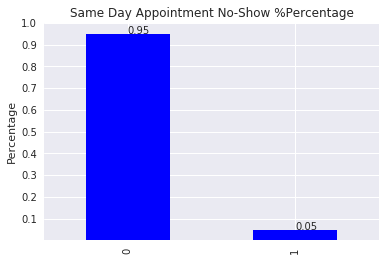

In [126]:
waited_df = df.query(f'waiteddays==0')['no_show'].value_counts(normalize=True).round(2)
vals = waited_df.values
waited_df.plot(kind='bar',color='b')
plt.title(f'Same Day Appointment No-Show %Percentage')
plt.ylabel('Percentage')
plt.yticks([0.10,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
for i in range(len(vals)):
        plt.text(i,waited_df[i],waited_df[i])

#### Following Days Average Appointment No-Show % Percentage 

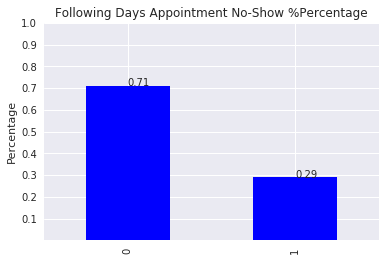

In [127]:
waited_df = df.query(f'waiteddays>0')['no_show'].value_counts(normalize=True).round(2)
vals = waited_df.values
waited_df.plot(kind='bar',color='b')
plt.title('Following Days Appointment No-Show %Percentage')
plt.ylabel('Percentage')
plt.yticks([0.10,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
for i in range(len(vals)):
        plt.text(i,waited_df[i],waited_df[i])

>On average, 95% of those who make an appointment on the same day  show up on their appointment.

> Those who make appointments on the same day have an average attendance rate of 13% more than those who make appointments on subsequent dates.

### Follow up Question (Among people who make an appointment on the same day or at a later date, what is the Schedule day / Appointment day with the highest average no show rate?, What are the values?)

#### Average Appointment No-Show % Percentage of patients by Day of Week Scheduled who made an appointment on the same day

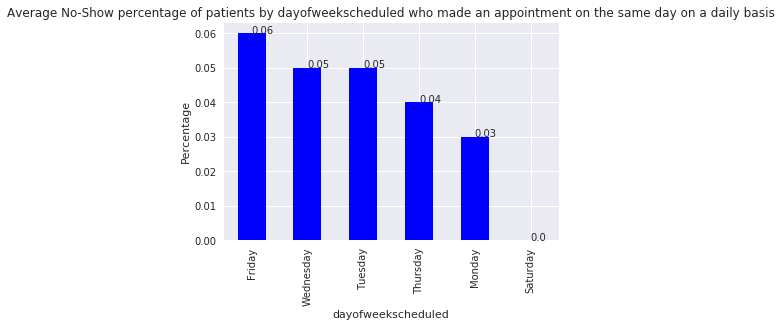

In [119]:
avg_no_show_by_zero_waitingday('dayofweekscheduled')

> Among those people who made an appointment on the same day, **Friday** has average **the highest risk** to miss an appointment. 

> Among those people who made an appointment on the same day, **Saturday** has **0% No Show**. It means that all of the people on **Saturday** did not miss their appointment.

#### Average Appointment No-Show % Percentage of patients by Day of Week Scheduled who made an appointment on the following days

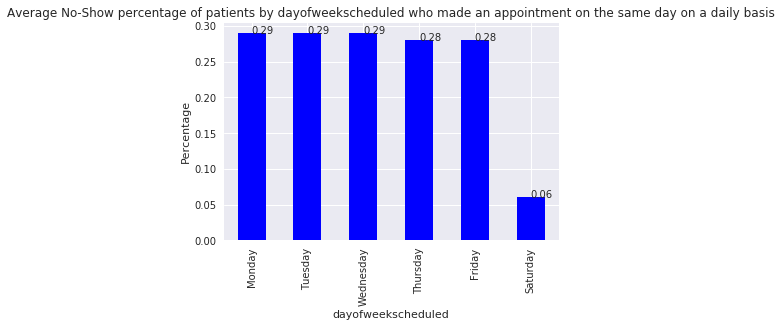

In [120]:
avg_no_show_by_different_waitingdays('dayofweekscheduled')

> The rates of No Show **do not** change in terms of the scheduling days for appointments given at a later date.

> Saturday has the lowest No-Show rate on basis from the point of view of scheduling day. If someone registers or call the hospital on Saturday, %93 chance the patient will show up in appointments given at a later date.

#### Average Appointment No-Show % Percentage of patients by Day of Week Appointment who made an appointment on the same day 

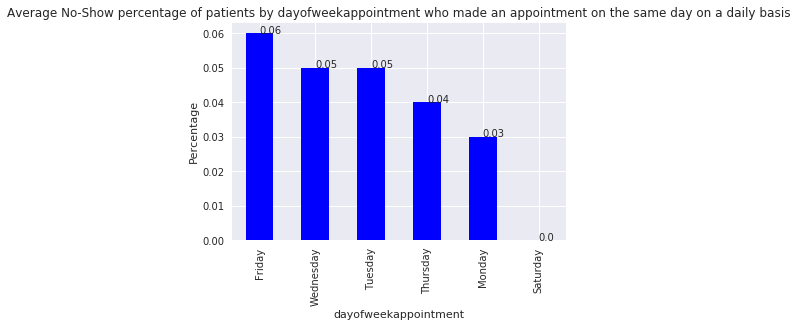

In [121]:
avg_no_show_by_zero_waitingday('dayofweekappointment')

>Among those people who made an appointment on the same day, Friday has the highest risk of No-Show in terms of the appointment day. 

>**If a patient has an appointment on Friday, he or she will show up less likely than other days.**

#### Average Appointment No-Show % Percentage of patients by Day of Week Appointment who made an appointment on the following days

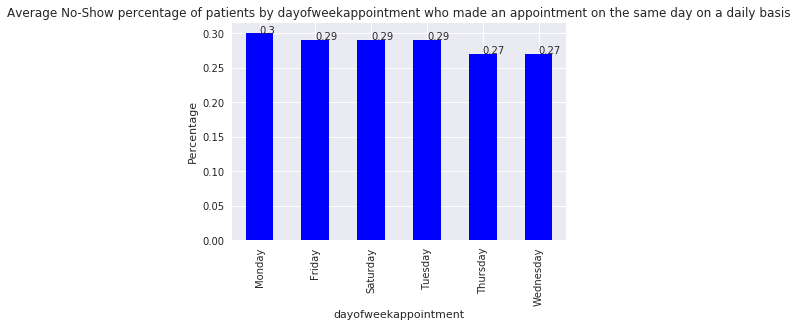

In [122]:
avg_no_show_by_different_waitingdays('dayofweekappointment')

>Within appointments given at a later date, Monday has the highest risk of No-Show in terms of the appointment day. 

>If a patient has an appointment on Monday in a later date, he or she will show up less likely than other days.

### Research Question 3 (Which Age Category has the highest No-show Ratio by Gender?)

#### Average Appointment No-Show % Percentage Gender: Female

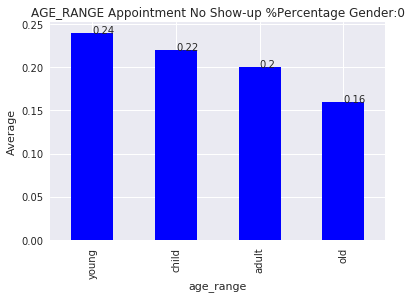

In [123]:
#Visualize the No-Show Ratio by Age Group
plot_avg_by_gender('age_range',0)

#### Average Appointment No-Show % Percentage Gender: Male

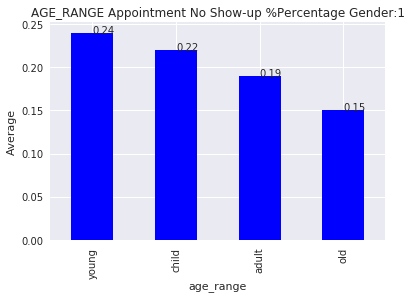

In [124]:
plot_avg_by_gender('age_range',1)

> Regardless of Gender, **Young** people are more likely to not attend their appointment.

> Regardless of Gender, Child category has **the highest risk** for No-Show which is %23.

> For both sexes, **younger people** are more likely **not to show up** for an appointment than older people.

<a id='conclusions'></a>
## Conclusions

   The answer are seen for the first question which is "Which features are more associated with the dependent value No-Show within **Gender, Age, Neighbourhood, Scholarship, Hipertention, Diabetes, Alcoholism, Handcap, Sms received**?" indiates that;

    1.The ratio of being a No-show varies between 18% and 30% according to the Handicap status. The No-Show rate of patients without any handicap is 20%.

    2.Gender or Alcohol use has no effect on the No-Show rate.

    3.Those who received reminder Sms have an 11% higher No-Show average rate compared to those who do not.

   The answer are seen for the second question which is **"What are the average appointment No-Show rates of the neighborhoods with the longest waiting time?**" indiates that;


    1. Among the neighbourhoods with the longest appointment waiting period, the cities with the highest No-show average are Ilhas, Santa Cecilia, Maruipe.

    2. ILHAS OCEÂNICAS DE TRINDADE neighbourhood has the highest risk for No-Show up. Because there is no any patient who          showed up so far.

    3. Except ILHAS OCEÂNICAS DE TRINDADE, No show rates differ %12 to %27 in these 10 neighbourhoods with the longest            duration.

   The answer are seen for the third question which is **Are those who make an appointment on the same day more likely to come to their appointment than those who make an appointment on the following days?**" indiates that;
     
    1. On average, 95% of those who make an appointment on the same day show up on their appointment.

    2. Those who make appointments on the same day have an average attendance rate of 13% more than those who make                appointments on subsequent dates.
    
   The answers are seen for the follow up question which is **Among people who make an appointment on the same day or at a later date, what is the Schedule day / Appointment day with the highest average no show rate?, What are the values?** indiates that;

   **For Appointment day;**
    
    1. Among those people who made an appointment on the same day, Friday has average the highest risk to miss an                 appointment.

    2. Among those people who made an appointment on the same day, Saturday has 0% No Show. It means that all of the people on Saturday did not miss their appointment
    
    3. Among those people who made an appointment on the same day, Friday has the highest risk of No-Show in terms of the          appointment day.
     
    4. If a patient has an appointment on Friday, he or she will show up less likely than other days.
     
     
   **For Scheduling day;**
    
    1. The rates of No Show do not change in terms of the scheduling days for appointments given at a later date.

    2. Saturday has the lowest No-Show rate on basis from the point of view of scheduling day. If someone registers or call the hospital on Saturday, %93 chance the patient will show up in appointments given at a later date.


    
   The answers are seen for the follow up question which is **Which Age Category has the highest No-show Ratio by Gender?** indiates that;
   
    1. Regardless of Gender, Young people are more likely to not attend their appointment.

    2. Regardless of Gender, Child category has the highest risk for No-Show which is %23.

    3. For both sexes, younger people are more likely not to show up for an appointment than older people.
    
   **Limitations:**
   
   The dataset **does not include** some crucial points chich indicate the **weather conditions and preferred/compulsory transportation of the appointment day and whether there is a fear of a doctor's examination**. 
   
   Note: I used this resource when detecting limitations.
   
   https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7280239/


In [128]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0